In [11]:
import os
dataset_dir = 'C:/Users/zaema/Downloads/archive/'

for file_name in os.listdir(dataset_dir):
  print(file_name)

subject01.centerlight
subject01.glasses
subject01.happy
subject01.leftlight
subject01.noglasses
subject01.normal
subject01.rightlight
subject01.sad
subject01.sleepy
subject01.surprised
subject01.wink
subject02.centerlight
subject02.glasses
subject02.happy
subject02.leftlight
subject02.noglasses
subject02.normal
subject02.rightlight
subject02.sad
subject02.sleepy
subject02.surprised
subject02.wink
subject03.centerlight
subject03.glasses
subject03.happy
subject03.leftlight
subject03.noglasses
subject03.normal
subject03.rightlight
subject03.sad
subject03.sleepy
subject03.surprised
subject03.wink
subject04.centerlight
subject04.glasses
subject04.happy
subject04.leftlight
subject04.noglasses
subject04.normal
subject04.rightlight
subject04.sad
subject04.sleepy
subject04.surprised
subject04.wink
subject05.centerlight
subject05.glasses
subject05.happy
subject05.leftlight
subject05.noglasses
subject05.normal
subject05.rightlight
subject05.sad
subject05.sleepy
subject05.surprised
subject05.wink


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
import tensorflow as tf  

In [12]:
data = []  # List to store image data
labels = []  # List to store labels

# Define a function to extract the person label from the file name
def extract_person_label(file_name):
    return int(file_name.split('.')[0].replace('subject', '')) - 1  # Subtract 1 to make labels start from 0

# Load data and labels
# Assuming the dataset files are in the 'dataset' directory
dataset_dir = 'C:/Users/zaema/Downloads/archive/'

for file_name in os.listdir(dataset_dir):
    img = plt.imread(os.path.join(dataset_dir, file_name))
    # print(img.shape)
    data.append(img.flatten())  # Flatten image into a 1D array
    labels.append(extract_person_label(file_name))

data = np.array(data)
labels = np.array(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


In [13]:
len(X_train),len(y_train)

(132, 132)

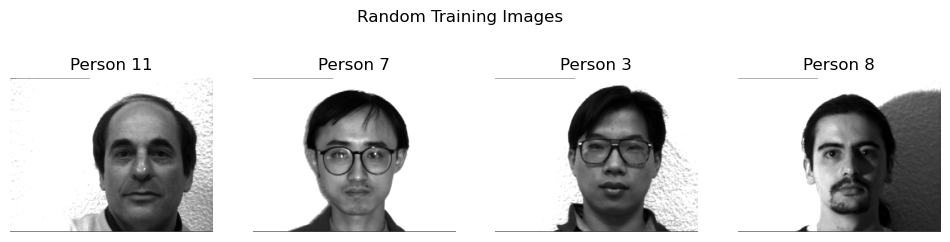

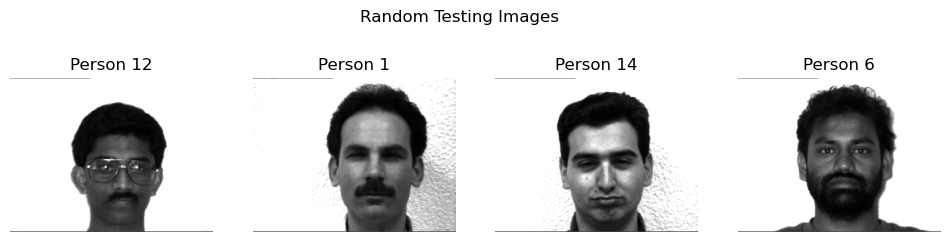

In [14]:
import random

# Randomly select four indices from the training dataset
train_indices = random.sample(range(len(X_train)), 4)

# Randomly select four indices from the testing dataset
test_indices = random.sample(range(len(X_test)), 4)

# Function to display images
def display_images(images, labels, title):
    plt.figure(figsize=(12, 3))
    plt.suptitle(title)
    for i, (image, label) in enumerate(zip(images, labels), 1):
        plt.subplot(1, 4, i)
        plt.imshow(image.reshape((243, 320)), cmap='gray')
        plt.title(f"Person {label}")
        plt.axis('off')
    plt.show()

# Display four random training images
train_images_to_display = X_train[train_indices]
train_labels_to_display = y_train[train_indices]
display_images(train_images_to_display, train_labels_to_display, "Random Training Images")

# Display four random testing images
test_images_to_display = X_test[test_indices]
test_labels_to_display = y_test[test_indices]
display_images(test_images_to_display, test_labels_to_display, "Random Testing Images")

In [15]:
# Create MLP model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(15, activation='softmax')  # 15 output classes for 15 subjects
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20
4/4 [==============================] - 2s 213ms/step - loss: 9546.0840 - accuracy: 0.0952 - val_loss: 16911.0332 - val_accuracy: 0.0741
Epoch 2/20
4/4 [==============================] - 1s 157ms/step - loss: 13054.8662 - accuracy: 0.0952 - val_loss: 9729.9238 - val_accuracy: 0.0741
Epoch 3/20
4/4 [==============================] - 1s 138ms/step - loss: 6415.9209 - accuracy: 0.1524 - val_loss: 5386.1875 - val_accuracy: 0.1111
Epoch 4/20
4/4 [==============================] - 0s 124ms/step - loss: 4317.3838 - accuracy: 0.1143 - val_loss: 3329.2427 - val_accuracy: 0.1852
Epoch 5/20
4/4 [==============================] - 1s 128ms/step - loss: 2810.3352 - accuracy: 0.1714 - val_loss: 2705.5212 - val_accuracy: 0.0741
Epoch 6/20
4/4 [==============================] - 1s 137ms/step - loss: 1664.9182 - accuracy: 0.2190 - val_loss: 2076.4119 - val_accuracy: 0.2593
Epoch 7/20
4/4 [==============================] - 1s 135ms/step - loss: 1871.1552 - accuracy: 0.2571 - val_loss: 1170.1182

In [16]:
# Test the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate precision, recall, and f1-score
precision = precision_score(y_test, y_pred_classes, average='macro')
recall = recall_score(y_test, y_pred_classes, average='macro')
f1 = f1_score(y_test, y_pred_classes, average='macro')

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

2/2 [==============================] - 0s 6ms/step
Precision: 0.67
Recall: 0.65
F1-score: 0.63


c:\Users\zaema\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\zaema\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


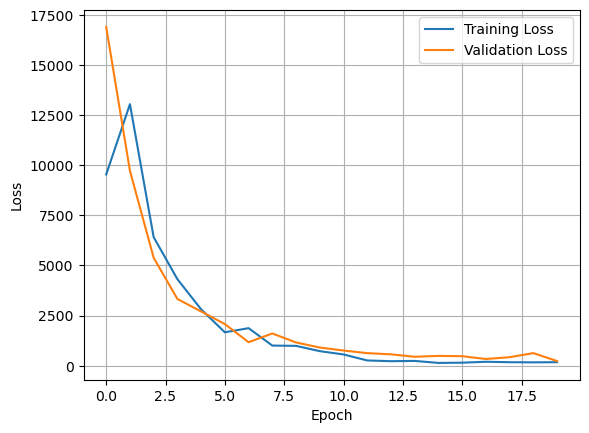

In [17]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()